# <font color='#004772'>Estatística <font/>

"É a ciencia que coleta, organiza, analisa e interpreta dados para tomada de decisões" (LARSON; FABER, 2014)


Como disciplina a estatistica se desenvolveu no século passado. Fundamentado na teoria da probabilidade desenvolvida no século *17* a *19* com base nos trabalhos de  **Thomas Bayes, Pierre-Simon Laplace e Carl Gauss**. A estatística moderna tem suas raízes no final do século 19 com **Francis Galton e Karl Pearson. R. A. Fisher**, no início do século 20, foi um dos pioneiros da estatística moderna, introduzindo idéias-chave de projeto experimental e estimativa de máxima verossimilhança (BRUCE et al. 2020)

## Estatística descritiva

É o ramo da estatística que envolve a organização, o
resumo e a representação dos dados.

## Sumário
1. [**Medidas de tendência central**](#MTC)             
    1.1 [Média](#media)  
    1.2 [Mediana e quantil](#mediana)  
    1.3 [Moda](#moda)
2. [**Medidas de disperção**](#MD)   
    2.1 [Amplitude](#a)  
    2.2 [Variância](#variancia)    
    2.3 [Desvio padrão](#sd)  
    2.4 [Erro padrão](#se)  
    2.5 [Coeficiente de variação](#cv)  
3. [**Visualização**](#visualização)  
    3.1 [Gráfico de barras](#barra)  
    3.2 [Gráfico de linhas](#linha)         
    3.3 [Histograma](#histograma)    
    3.4 [Boxplot](#boxplot)     
    3.5 [Diagrama de disperção](#disperção)
    

**Libs**

In [1]:
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

<div id="MTC"></div>   

## 1 Medidas de tendência central
    As medidas de tendência central definem valores significativos, representativos e adequados para um conjunto de dados, dependendo do que se deseja analisar. São elas a média, mediana, quantis e a moda.
<div id="media"></div>       
 
###    1.1 Média
    A média é uma medida de tendência central que indica o valor onde estão concentrados os dados de um conjunto de valores, representando um valor significativo para o mesmo.
 

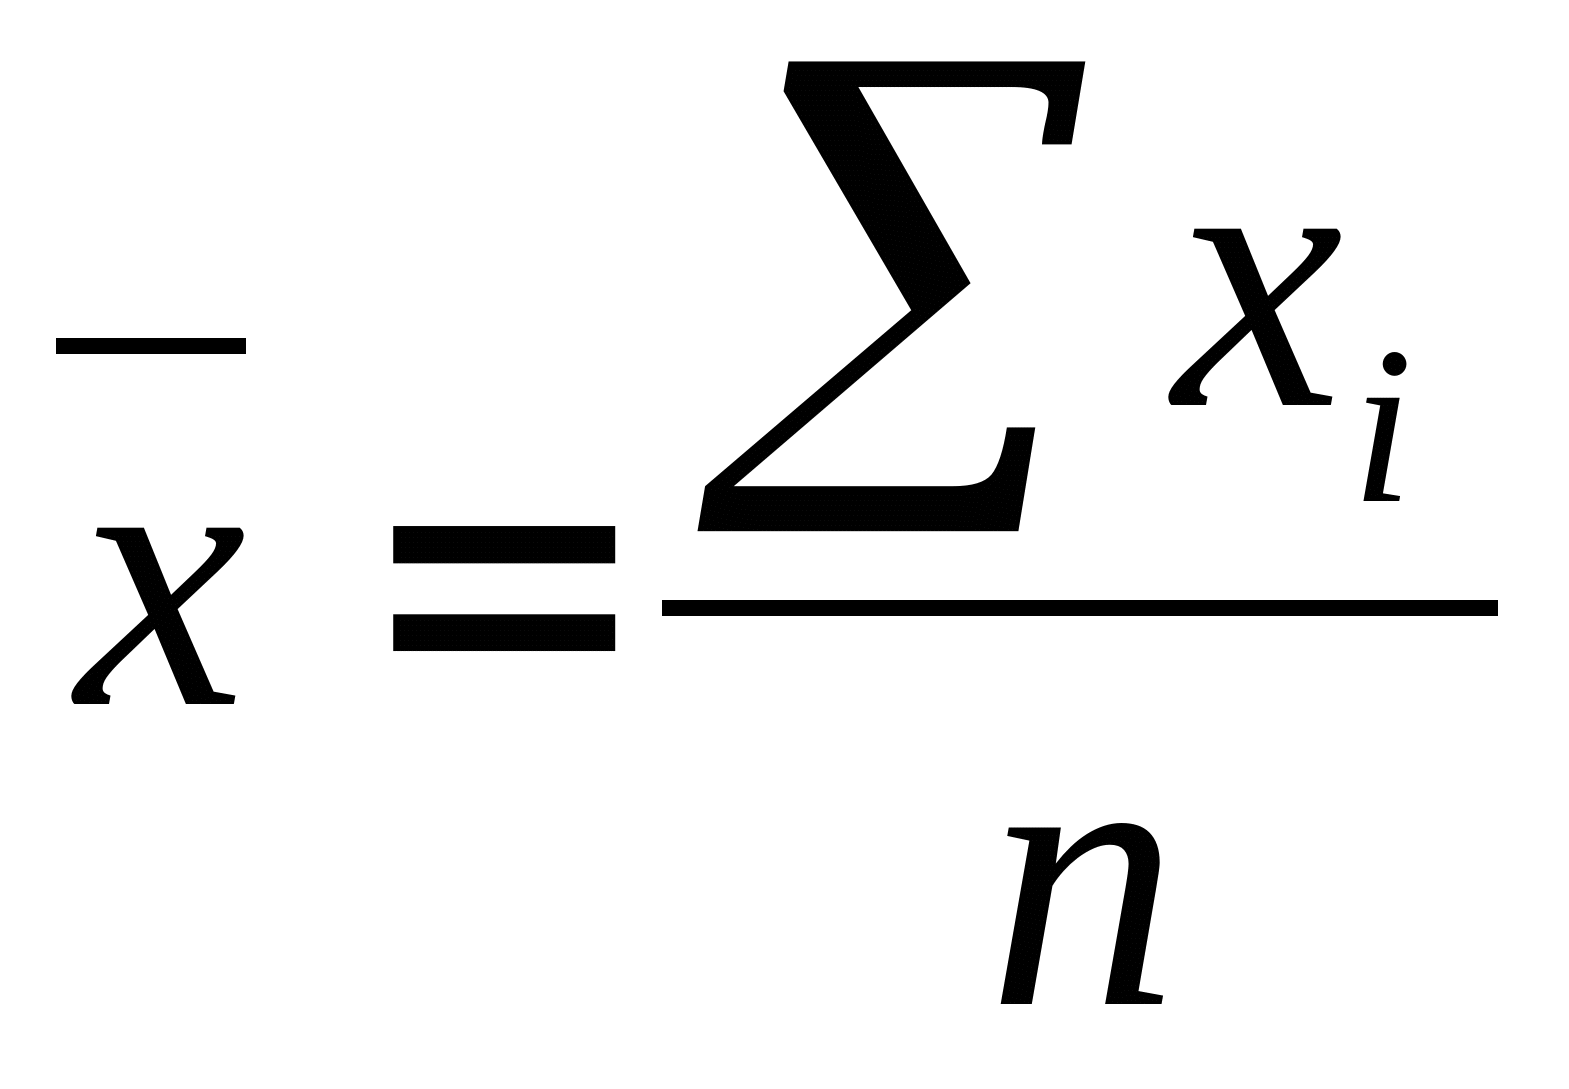

In [4]:
from IPython.display import Image
Image(filename='Formulas/media.gif', width=100, height=100)

In [5]:
# Média em uma lista
lista=[2,3,4,3,5]
np.mean(lista)
# média com valores faltantes
np.nanmean([2,3,4,3,np.nan,5])

3.4

In [6]:
# Média em um objeto pandas
df=pd.DataFrame({'A':[2,3,4,3,5],'B':[2,3,4,3,np.nan]})
df

,A,B
0,2,2.0
1,3,3.0
2,4,4.0
3,3,3.0
4,5,NaN


In [7]:
print('media de A:',df['A'].mean())
print('media de B:',df['B'].mean())

media de A: 3.4
media de B: 3.0


In [8]:
# média do dataframe
df.mean()
# df.apply(np.mean, axis=0)

A    3.4
B    3.0
dtype: float64

In [7]:
#Substituir valor faltante

In [9]:
df['B']=df['B'].fillna(np.nanmedian(df.B))
df

,A,B
0,2,2.0
1,3,3.0
2,4,4.0
3,3,3.0
4,5,3.0


<div id="mediana"></div> 

### 1.2 Mediana e Quantil
    A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição. Na prática, se o número de observações na distribuição é ímpar, ele é o valor central, e se o número de observações é par, ele será a média das duas observações mais centrais. 

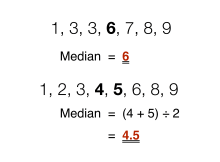

In [10]:
from IPython.display import Image
Image(filename='Formulas/mediana.png', width=200, height=100)

In [11]:
lista=[2,3,4,3,5]
np.median(lista)

3.0

In [12]:
df.median()

A    3.0
B    3.0
dtype: float64

In [13]:
np.quantile(lista, q=[0.25,0.5,0.75])

array([3., 3., 4.])

### 1.3 Moda
Valor mais frequente

In [27]:
lista=[2,3,2,3,4,3,5,3,6,8,4,6,6]
stats.mode(lista)[0]
# df.mode()

array([3])

<div id="MD"></div>   

## 2 Medidas de disperção

<div id="a">   

### 2.1 Amplitude

In [136]:
np.random.seed(111)

lista=np.random.randint(2,10,15)
lista
minimo=np.min(lista)
maximo=np.max(lista)

print('A amplitude:',maximo-minimo)

A amplitude: 7


<div id='variancia'>

### 2.2 Variância

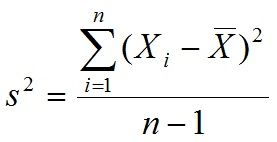

In [78]:
from IPython.display import Image
Image(filename='Formulas/variancia.jpg', width=150 , height=100)

In [157]:
np.random.seed(111)
A=np.random.randint(5,10,10)
print('lista A:',A)
print('Variância populacional',np.var(A))
print('Variância amostral',np.var(A,ddof=1))

lista A: [9 9 9 9 8 6 7 7 5 6]
Variância populacional 2.05
Variância amostral 2.2777777777777777


In [140]:
def var(x):
    v=np.sum((x-np.mean(x))**2)/(np.size(x)-1)
    return v
var(A)

2.2777777777777777

<div id="sd">   

### 2.3 Desvio padrão

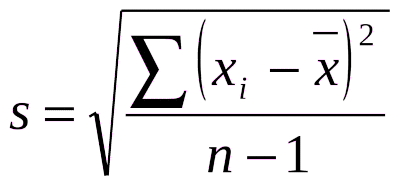

In [9]:
from IPython.display import Image
Image(filename='Formulas/desvio_padrao.png', width=150 , height=100)

In [10]:
# Desvio padrão em uma lista 
lista=[2,3,4,3,5]
std=np.std(lista)
std_nan=np.nanstd([2,3,4,3,np.nan,5])

print('Desvio padrão = {}\nDesvio padrão NaN = {}'. format(round(std,2),round(std_nan,2)))

Desvio padrão = 1.02
Desvio padrão NaN = 1.02


In [11]:
# Desvio padrão amostral
std_amostral=df['A'].std()
# Desvio padrão populacional
std_populacional=df['A'].std(ddof=0)

print('Desvio padrão amostral: {}\nDesvio padrão populacional: {}'.format(std_amostral,std_populacional))

Desvio padrão amostral: 1.140175425099138
Desvio padrão populacional: 1.019803902718557


In [47]:
# std do dataframe
df.std()
# df.apply(np.std, axis=0)

A    1.140175
B    0.707107
dtype: float64

<div id="se"></div>   

### 2.3 Erro Padrão

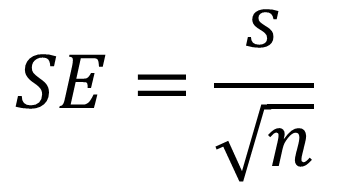

In [13]:
from IPython.display import Image
Image(filename='Formulas/erro_padrao.png', width=100 , height=100)

In [14]:
def se(x):
    e=np.std(x,ddof=1)/sqrt(np.size(x))
    return e

In [15]:
se(lista)

0.5099019513592785

In [16]:
df.apply(se, axis=0)

A    0.509902
B    0.316228
dtype: float64

<div id="cv"></div>   

### 2.4 Coeficiente de variação

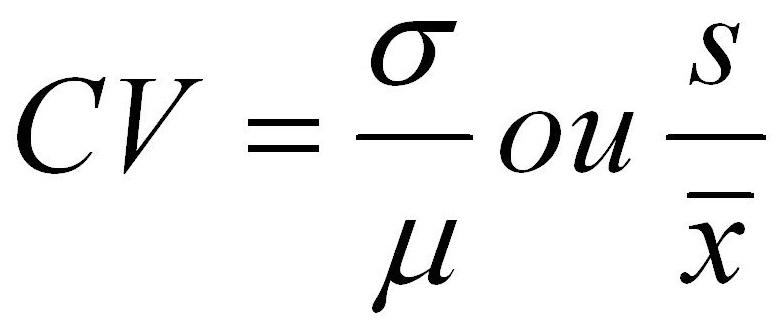

In [17]:
from IPython.display import Image
Image(filename='Formulas/cv.JPG', width=150 , height=100)

In [18]:
# Função anônima
cv=lambda x: np.std(x, ddof=1)/np.mean(x)
cv(lista)

0.3353457132644524

In [19]:
df.apply(cv, axis=0)

A    0.335346
B    0.235702
dtype: float64

## Exercício 

As idades dos funcionários em um departamento estão listadas a seguir:  
`[34,27,50,45,41,37,24,57,40,38,62,44,39,40,36,32,25,22,42,31,55,46]`  
Calcule a média, desvio padrão amostral, erro padrão, mediana, e os quantis(0.25,0.5,0.75).  
Represente os devidos resultados da seguinte maneira "medida de tendência central $\pm$ medida de disperção"  







In [7]:
print("\u00B1")

±


<div id="visualização"></div>   

# <font color='#004772'>3 Visualização  de gráficos estatísticos com seaborns <font/>

Na estatística é comun visualizar os dados graficamente

In [4]:
# Carregando um dos datasets que vem com o Seaborn
df_tips = sns.load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


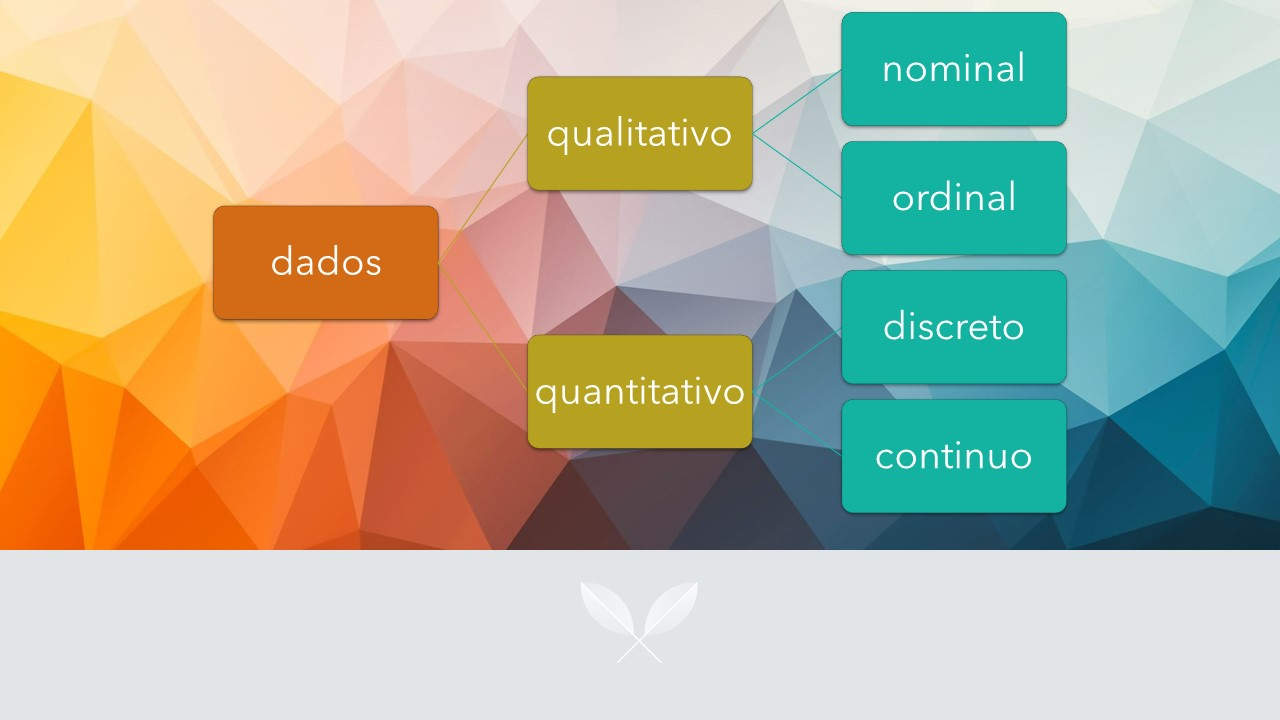

In [5]:
from IPython.display import Image
Image(filename='Formulas/tipo_dados.jpg', width=800 , height=720)

In [6]:
print(df_tips.dtypes)
df_tips.head()

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<div id='barra'><div/>

## 3.1 Grafico de barras

In [7]:
#Temas
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Paleta de cores
https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

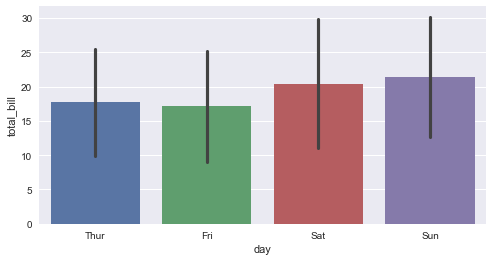

In [8]:
plt.style.use('seaborn')

plt.figure(figsize=(8,4))
fig=sns.barplot(x='day',y='total_bill', data=df_tips, ci='sd')
# fig=sns.barplot(x='day',y='total_bill', data=df_tips, ci='sd', errwidth=1.2, edgecolor="black", capsize=0.1)

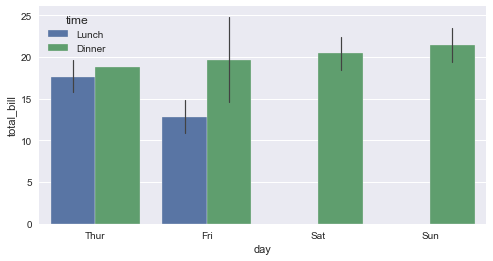

In [169]:
plt.figure(figsize=(8,4))

fig=sns.barplot(x='day',y='total_bill', hue='time' ,data=df_tips, ci=95,errwidth=1.2)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

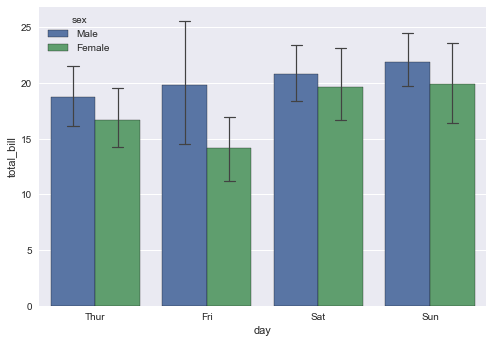

In [23]:
sns.barplot(x='day',y='total_bill', data=df_tips, hue='sex', errwidth=1.2, edgecolor="black", capsize=0.1)

In [31]:
df_count=df_tips['sex'].value_counts()
df_count

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

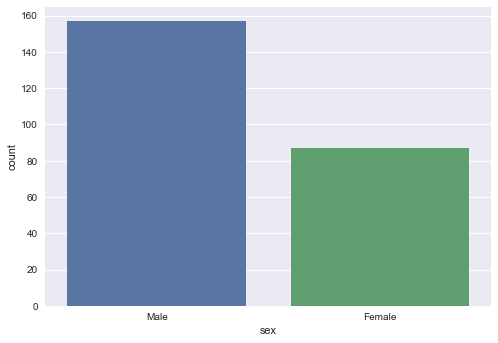

In [32]:
sns.barplot(x=df_count.index,y=df_count)
# sns.countplot(x='sex', data=df_tips)

[catplot()](https://seaborn.pydata.org/tutorial/categorical.html)

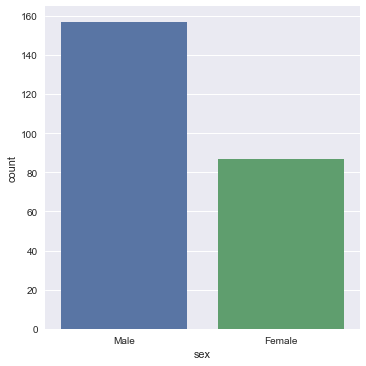

In [11]:
sns.catplot(x="sex", kind="count", data=df_tips)

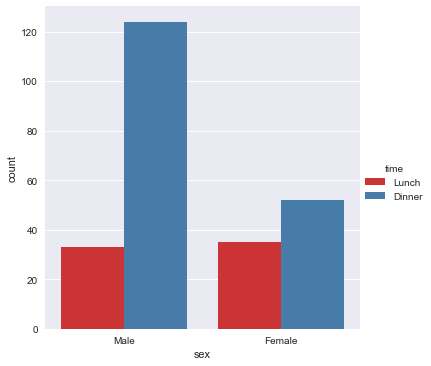

In [9]:
sns.catplot(x="sex", kind="count", hue='time' , palette='Set1' ,data=df_tips)

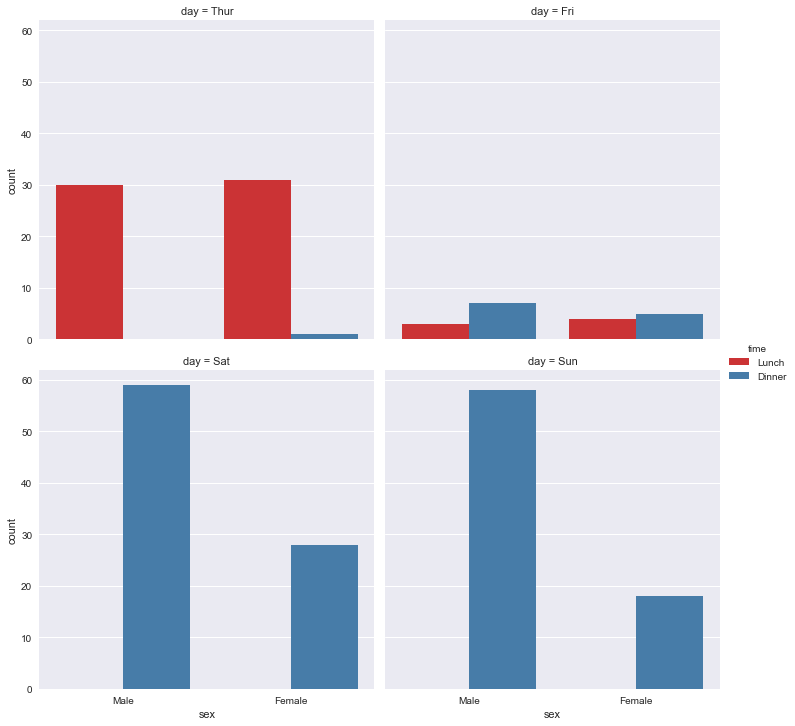

In [12]:
sns.catplot(x="sex", kind="count", hue='time', col='day', col_wrap=2, palette='Set1' ,data=df_tips)

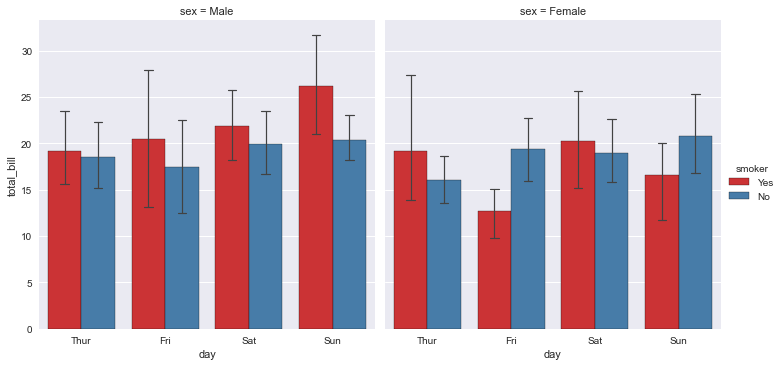

In [28]:
sns.catplot(x="day", y='total_bill', kind="bar", hue='smoker',col='sex', col_wrap=2, palette='Set1', data=df_tips, errwidth=1.2, edgecolor="black", capsize=0.1) 

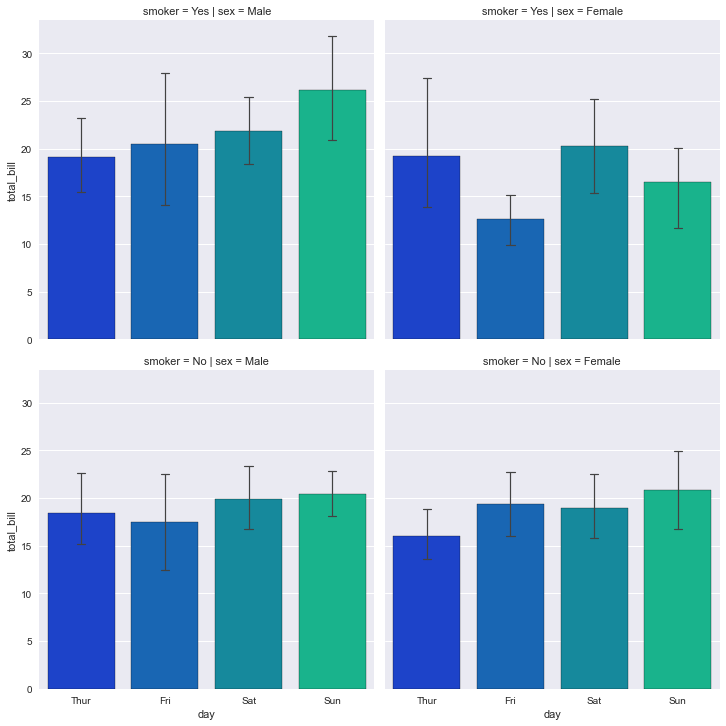

In [6]:
g=sns.catplot(x="day", y='total_bill', kind="bar", col='sex', row='smoker', data=df_tips, palette='winter', errwidth=1.2, edgecolor="black", capsize=0.1) 
g.set_axis_labels(x='dia', y='conta')

<div id='linha'><div>

## 3.2 Grafico de Linhas

[lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [16]:
df_flights = sns.load_dataset("flights")
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


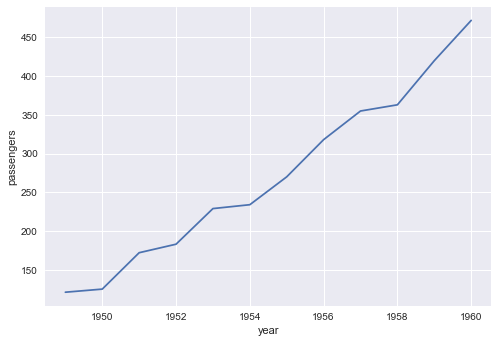

In [20]:
df_flights_may = df_flights.query("month == 'May'")
g=sns.lineplot(data=df_flights_may, x="year", y="passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

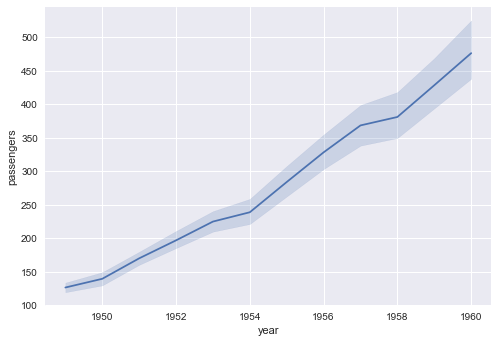

In [22]:
sns.lineplot(data=df_flights, x="year", y="passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

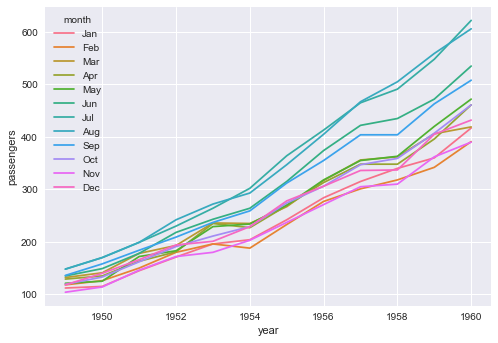

In [23]:
sns.lineplot(data=df_flights, x="year", y="passengers", hue="month")

<AxesSubplot:xlabel='year', ylabel='passengers'>

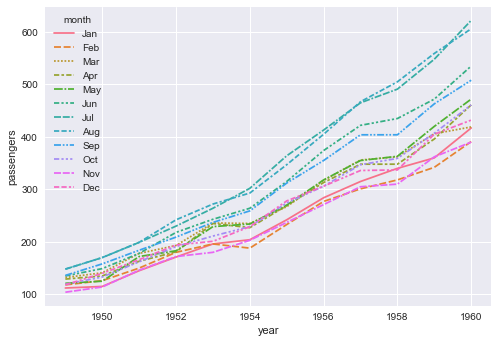

In [24]:
sns.lineplot(data=df_flights, x="year", y="passengers", hue="month", style="month")

[relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

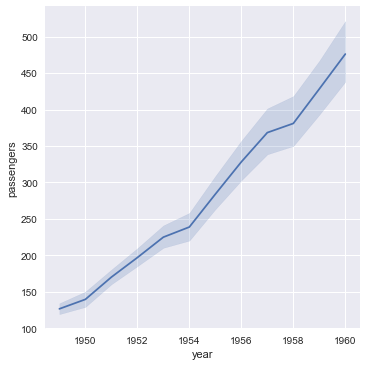

In [37]:
sns.relplot(x='year',y='passengers', kind='line' ,data=df_flights)

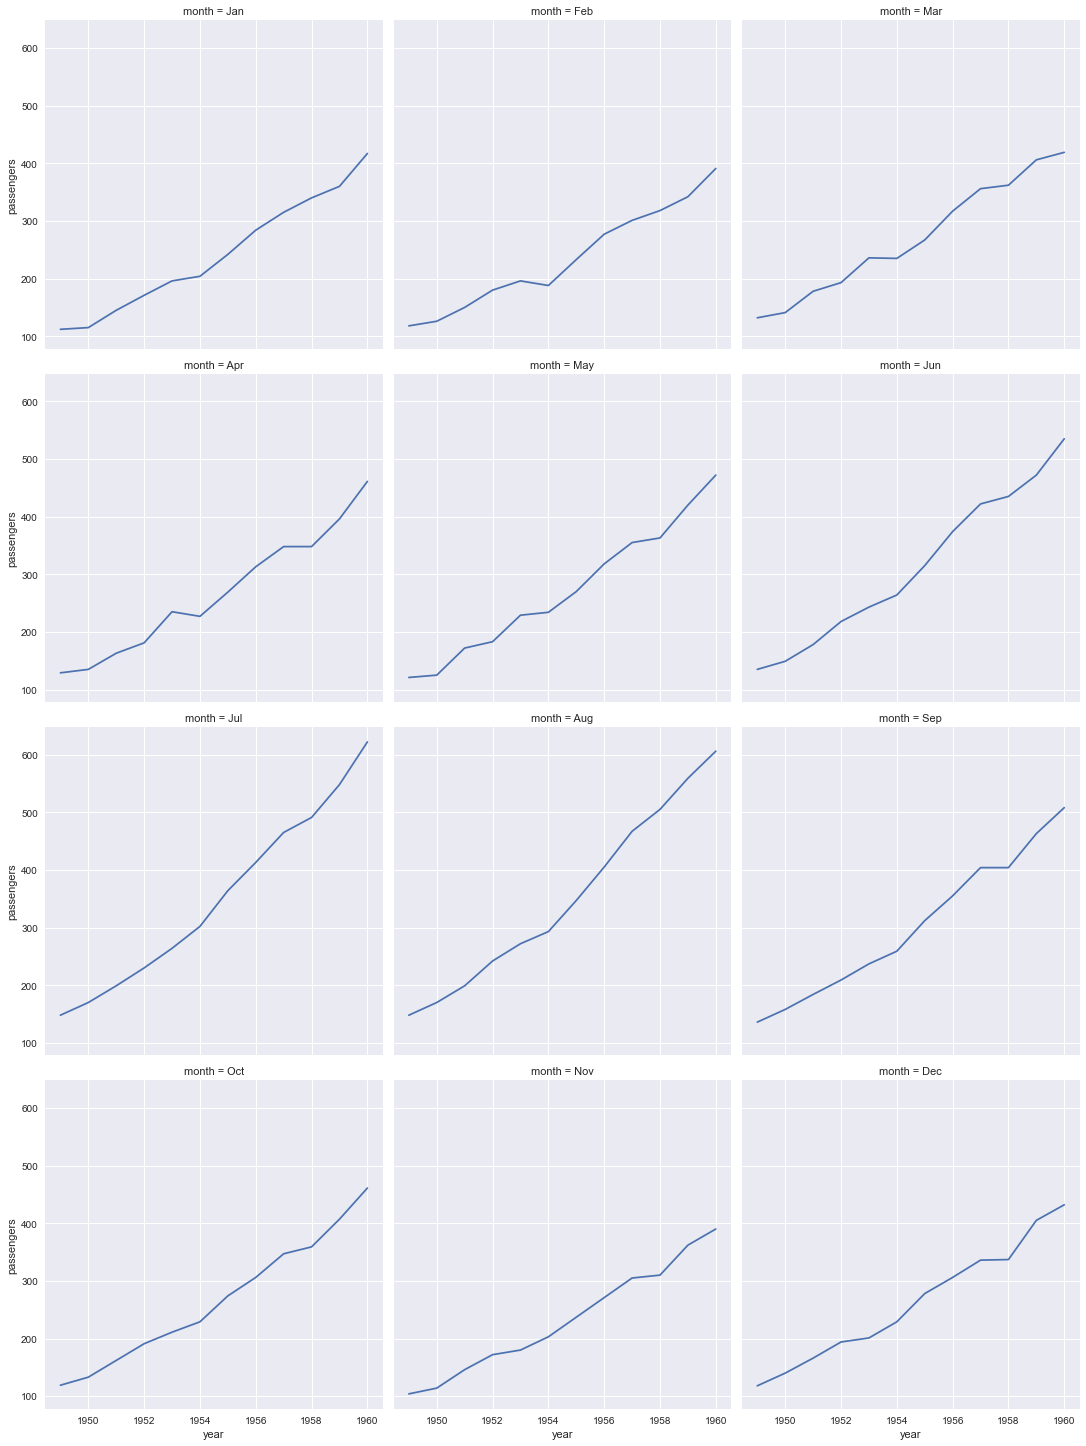

In [34]:
sns.relplot(x='year',y='passengers', kind='line', col='month', col_wrap=3 ,data=df_flights)

<div id='histograma'><div/>

## 3.3 Histograma


In [3]:
# Carregando um dos datasets que vem com o Seaborn
df_tips = sns.load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


[histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

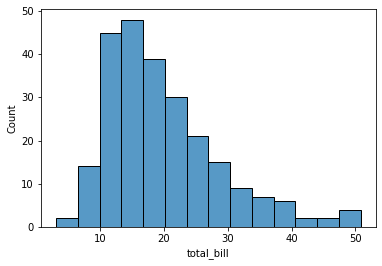

In [4]:
g=sns.histplot(x='total_bill',data=df_tips)
# g.figure.savefig('hist.png', dpi=300)

### 3.3.1 Distribuição de frequência

Mostra o número de observações que estão em um intervalo específico 

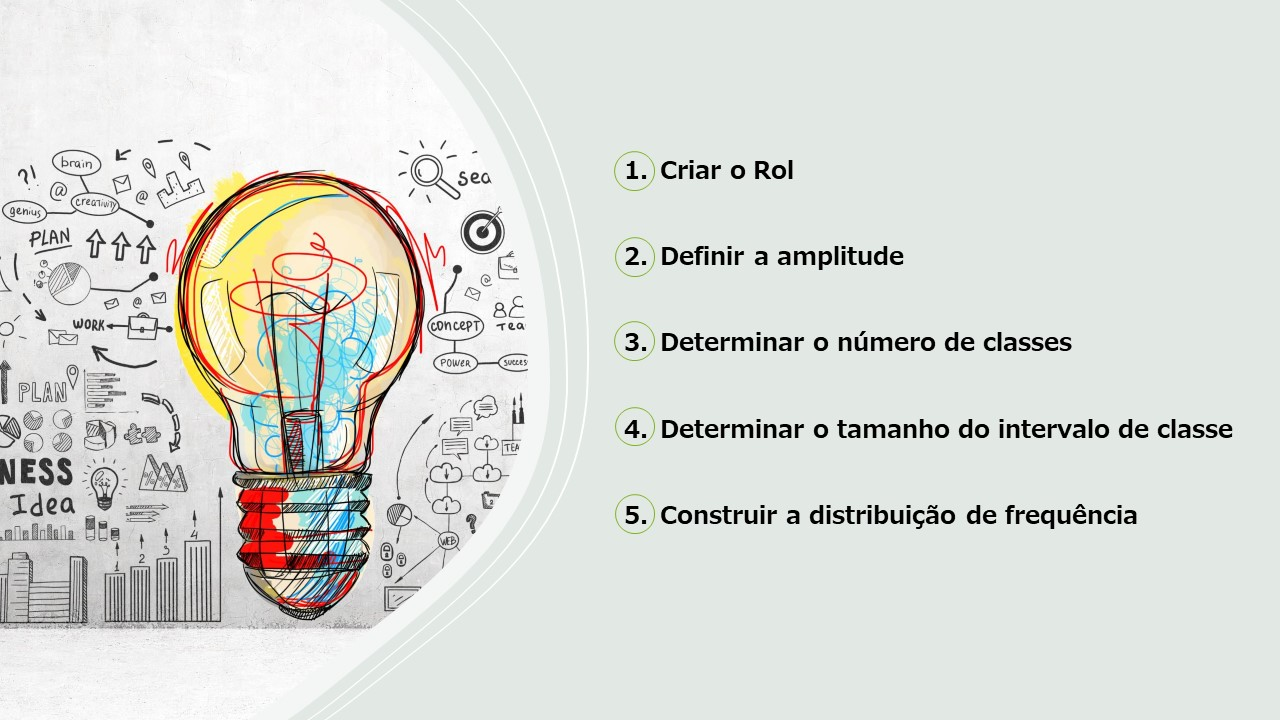

In [128]:
from IPython.display import Image
Image(filename='Formulas/distribuicao_freq.jpg', width=720 , height=720)

In [124]:
np.random.seed(3)
lista=np.random.randint(3,10,15)
lista

array([5, 3, 4, 6, 3, 3, 3, 8, 8, 6, 5, 6, 4, 4, 5])

In [125]:
# pd series 
df_freq=pd.Series(lista).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df_freq.columns=['classe','Freq.']
df_freq

,classe,Freq.
0,3,4
1,4,3
2,5,3
3,6,3
4,8,2


In [232]:
# pd series, alterar número de classes
df_freq=pd.Series(lista).value_counts(bins=3,).reset_index().sort_values('index').reset_index(drop=True)
df_freq.columns=['classe','Freq.']
df_freq

,classe,Freq.
0,"(2.994, 4.667]",7
1,"(4.667, 6.333]",6
2,"(6.333, 8.0]",2


In [207]:
# pd.cut() Use cut when you need to segment and sort data values into bins
df_freq=pd.DataFrame(dict(valor=lista))
df_freq['classe']=pd.cut(lista, bins=4,)
df_freq.groupby('classe').size().to_frame(name='valor').reset_index()

,classe,valor
0,"(2.995, 4.25]",7
1,"(4.25, 5.5]",3
2,"(5.5, 6.75]",3
3,"(6.75, 8.0]",2


In [308]:
# pd.cut() Use cut when you need to segment and sort data values into bins
df_freq=pd.DataFrame(dict(valor=lista))
df_freq['classe']=pd.cut(lista, bins=3,labels=['baixo','regular','alto'])
df_freq=df_freq.groupby('classe').size().to_frame(name='Freq.').reset_index()
df_freq['freq_rela']=(df_freq['Freq.']/df_freq['Freq.'].sum())*100
df_freq.round(2)

,classe,Freq.,freq_rela
0,baixo,7,46.67
1,regular,6,40.00
2,alto,2,13.33


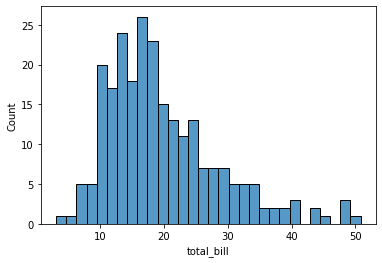

In [18]:
# número de barras
g=sns.histplot(x='total_bill',bins=30, data=df_tips)

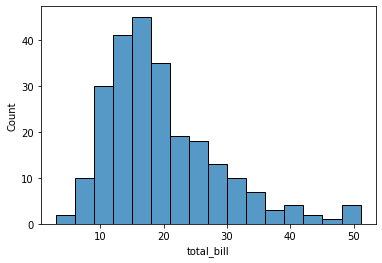

In [19]:
# largura binwidth:
g=sns.histplot(x='total_bill',binwidth=3, data=df_tips)

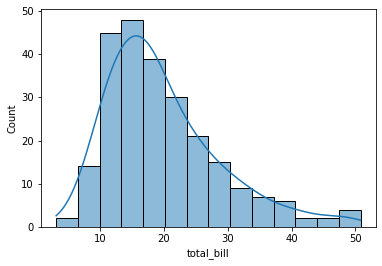

In [26]:
# kernel density estimate 
g=sns.histplot(x='total_bill',kde=True , data=df_tips)

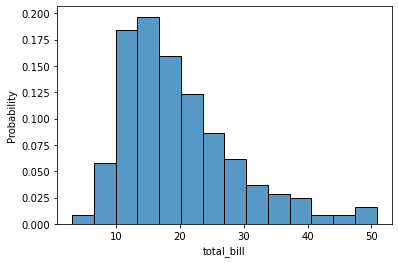

In [41]:
# desenha multiplos histogramas
g=sns.histplot(x='total_bill',stat="probability",  data=df_tips)

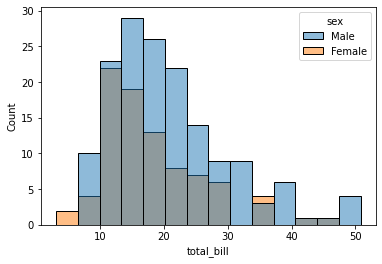

In [36]:
# desenha multiplos histogramas
g=sns.histplot(x='total_bill',hue='sex', data=df_tips)

[displot()](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

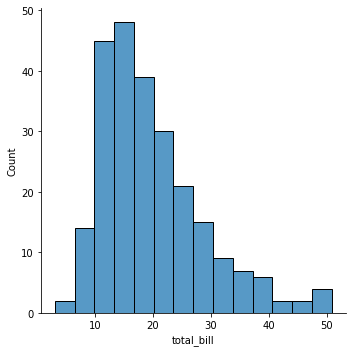

In [43]:
g=sns.displot(x='total_bill', data=df_tips)

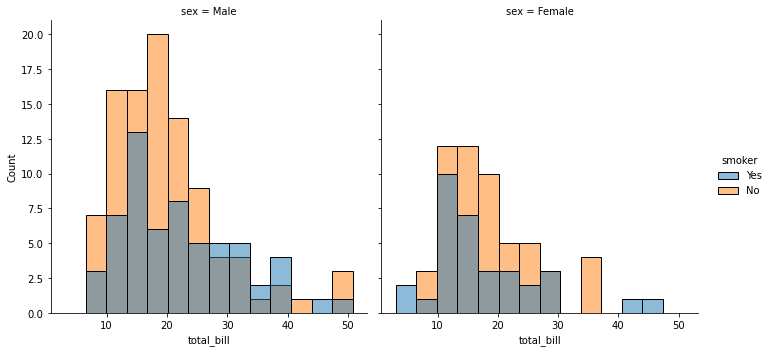

In [51]:
g=sns.displot(x='total_bill', hue='smoker', col='sex' ,data=df_tips)

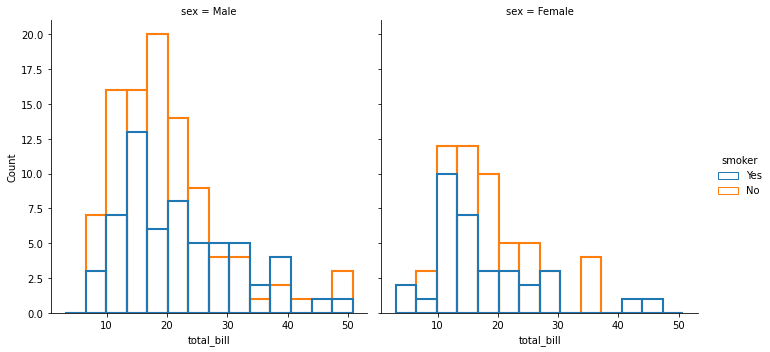

In [50]:
g=sns.displot(x='total_bill', hue='smoker', col='sex' ,data=df_tips, fill=False)

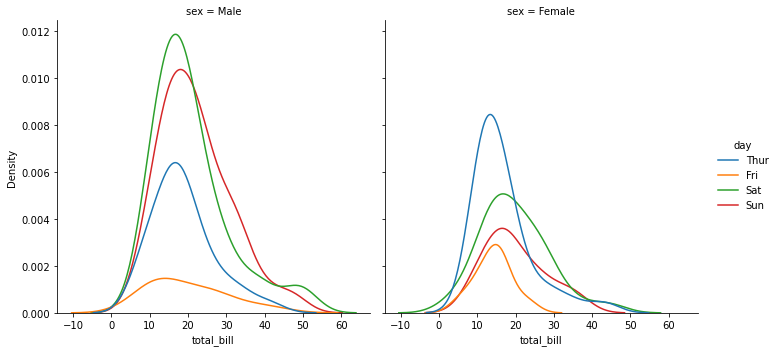

In [48]:
g=sns.displot(x='total_bill', hue='day', col='sex', kind='kde' ,data=df_tips)

In [12]:
#Importando Excel
file='dados/IDH.xlsx'
df_idh=pd.read_excel(file, sheet_name="Base")

print(df_idh.shape)
df_idh.head()

(92, 18)


,Espacialidades,ND,EV,Mi,PS60,QL,PIB,RP,Gi,P,VP,FC18,SC25,EAE,T18,PDA,PDBA,PDCL
0,Angra dos Reis,Outros,75.75,12.97,83.19,1.426171,4.540722e+06,798.68,0.50,6.69,21.42,55.41,7.42,9.00,5.43,92.49,95.45,99.26
1,Aperibé,C.Vicioso,72.10,18.40,77.85,1.113099,4.077564e+04,516.14,0.43,9.40,29.72,51.36,5.94,8.95,11.06,96.84,99.52,97.07
2,Araruama,Outros,75.32,14.18,82.88,0.409663,5.643963e+05,680.88,0.54,11.60,32.86,55.57,10.27,8.84,7.84,96.08,94.42,95.64
3,Areal,C.Vicioso,74.35,15.00,81.22,0.326421,8.742154e+04,571.74,0.48,11.13,32.21,46.76,6.24,9.21,7.77,85.66,98.20,98.57
4,Armação dos Búzios,C.Vicioso,74.44,14.80,81.36,0.054656,5.751335e+05,851.39,0.51,3.69,17.24,58.03,11.25,9.09,4.83,83.53,96.31,98.55


## Referências

LARSON, R.; FARBER, B. ESTATÍSTICA APLICADA–4ª. 2010.

BRUCE, Peter; BRUCE, Andrew; GEDECK, Peter. Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. O'Reilly Media, 2020.

https://pandas.pydata.org/pandas-docs/stable/index.html

https://seaborn.pydata.org/index.html
